# Welcome to the Drone Simulation notebook!
The goal of this notebook is for you to build a simulation of the flight of a drone while it drops off life saving medical supplies! The simulation will allow us to design an autonomous system that can make the deliveries without our intervention!

Let's get started by importing some packages. Take a look at the comments if you want to see what each does.

In [ ]:
# these libraries and setting will allow us to visualize the flight trajectories of our drone
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import random # Used to generate random numbers
import numpy as np # Used for matrices and arrays

### Defining the drone
We will begin by creating a new class that represents a drone. Remember that a class is a way of grouping variables together. This class should have four variables, two for the position of the drone and two for its velocity. 


In [ ]:
# init function lets user input what the four variables are 
class Drone:
     def __init__(self, x, y, vx, vy): 
       self.x = x    # x on its own is the input and self.x is the variable part of the class 
       self.y = y 
       self.vx = vx 
       self.vy = vy 


In lecture, we developed a model of the flight of a drone based on Newton's laws of motion. Here we will **implement** that model using python code! Write a function that takes in a drone and some applied forces `Fx`, `Fy` and updates the drones position and velocity

**Optional question:** We didn't choose to model drag from the air, but we could model this by saying that the drone has a max speed of `10`. change your update function so that the velocity of the drone is never larger than 10 in either direction. 

In [ ]:
def update(drone, Fx, Fy): # passing in three variables, drone is not the class variable it is like an instance of teh class (like s1 etc) 
  t = 1 # We assume the update happens every 1 second

  ## Your code here: 
  # Define the mass of the drone (your choice! but 1 is a good option)
  m = 1
  # Update the velocity of the drone based on the applied force

  drone.vx = drone.vx + (Fx/m) * t # acessing the Drone vx values we already created from the class 
  drone.vy = drone.vy + (Fy/m) * t

  # Update the position of the vehicle using the current velocity

  drone.x = drone.x + drone.vx * t 
  drone.y = drone.y + drone.vy * t


## Drone simulator
Now that we know how the drone will move at each timestep we can write our simulation loop. Follow the instructions in the code below to complete the loop

In [ ]:
def simulate(drone, controller = None, wind = None):
  # Start by making some empty lists that will store the drone's position over time
  xs = []
  ys = []

  # Set the initial time to be zero
  ## Your code here:
  t = 0
  # Write a loop that will run until t=100, incrementing t by 1 each time
  ## Your code here:
  while t < 101: 
    # Add the current position of the drone to each of the lists
    ## Your code here:
    t += 1
    x = drone.x 
    xs.append(x)
    y = drone.y 
    ys.append(y)
    vx = drone.vx 
    vy = drone.vy 
    # Compute the controller thrust and the wind
    Tx, Ty = (0,0) if controller is None else controller(t)
    Wx, Wy = (0,0) if wind is None else wind(t)

    # Compute the forces acting on the drone:
    ## Your code here:
    Fx = Tx + Wx 
    Fy = Ty + Wy 
    # Use your `update` function to update the drone
    ## Your code here:
    update(drone, Fx, Fy)
  # Return the position and velocity 
  return (xs, ys)

## Animation and Plotting
The code in the next block is used to plot and animate the flight of your drone. 

**Optional question:** Look through the code and see if you can figure out how it works. Try changing the color of the lines and waypoints.

In [ ]:
path = "https://www.pinclipart.com/picdir/big/520-5207275_drone-clipart.png"
image = plt.imread(path)

def make_animation(drone_path, flight_plan = None, waypoints = None):
  assert(len(x) == len(y))
  fig, ax = plt.subplots()
  drone_x, drone_y = [], []
  fp_x, fp_y = [], []
  ln1, = plt.plot([], [], 'r-')
  ln2, = plt.plot([], [], 'b-')
  if waypoints is not None:
    ln3, = plt.plot([w[0] for w in waypoints], [w[1] for w in waypoints], 'y*', markersize=10)
  im = OffsetImage(image, zoom=2/ax.figure.dpi)
  im.image.axes = ax

  def init():
      ax.set_xlim(0, 110)
      ax.set_ylim(0, 110)
      ax.set_xlabel("x-position")
      ax.set_ylabel("y-position")
      
      return ln1,

  def frame(i):
      drone_x.append(drone_path[0][i])
      drone_y.append(drone_path[1][i])
      ln1.set_data(drone_x, drone_y)

      if flight_plan is not None:
        fp_x.append(flight_plan[0][i])
        fp_y.append(flight_plan[1][i])
        ln2.set_data(fp_x, fp_y)
     
      ax.set_title("t=%d" % i)
      ab = AnnotationBbox(im, (x[i],y[i]), frameon=False, pad=0.0,)
      if len(ax.artists) > 0:
        ax.artists[0].remove()
      ax.add_artist(ab)
      return ln1,

  ani = animation.FuncAnimation(fig, frame, frames=range(0,len(x)-1,2),
                    init_func=init, blit=True)
  return ani

## Testing your simulation
Congrats on writing our simulation and update code! To make sure that it is working, lets run a simulation and then animate the results. The code below intializes a drone to the position (0,0) with a velocity of (1.5, 2.5) and lets the simulation run. The result should be that your drone flies in a straight line

In [ ]:
%%capture
drone_start = Drone(0,0,1.5,2.5)
x, y = simulate(drone_start)
anim = make_animation((x,y))
# Run the next block to see the results! (it may take a minute to run)

In [ ]:
anim

## Making our flightplan
The operations team has given us a map that shows all of the places that need medical supplies, shown as yellow stars or **waypoints** on the map below. Your job is to come up with a sequence of waypoints that we should visit. I should start and end with the location of our launching facility at `[0,0]`. You don't have to include all of the waypoints if you don't want to (we have other aircraft in the vicinity who can help out)

![image](https://drive.google.com/uc?export=view&id=1JgKU3VPz4RHZTadT_fnuEJwARpq2INE2)

Fill in your waypoint selections below:

In [ ]:
# Add more waypoints to the list here: 
waypoints = [[0,0], [20,30], [40,20], [0,0]]

## Designing a Flight Plan
Now that you have done the job of high-level "planning", this function with take your selected value of waypoints and produce a trajectory that passes through them in order. No need to write any code for the flight plan function but feel free to try to figure out what it is doing!

In [ ]:
def flight_plan(waypoints):
  # Initialize the lists that will store the xy positions of the flight plan
  xs = [] 
  ys = []

  # Number of timesteps to record
  T = 100

  # Compute the distance between each waypoint
  distances = []
  for i in range(1, len(waypoints)):
    w1 = waypoints[i-1]
    w2 = waypoints[i]
    distances.append(np.sqrt((w1[0] - w2[0])**2 + (w1[1] - w2[1])**2))

  # Compute the number of samples between each waypoints
  dtot = sum(distances)
  Npts = [int(round(T*d / dtot)) for d in distances]
  Npts[-1] += T - sum(Npts) # make sure the total points is 100

  for i in range(1, len(waypoints)):
    w1 = waypoints[i-1]
    w2 = waypoints[i]
    xs.extend(np.linspace(w1[0], w2[0], Npts[i-1]))
    ys.extend(np.linspace(w1[1], w2[1], Npts[i-1]))

  return (xs, ys)

Now lets Plot our flight plan. Run the code below to see the results

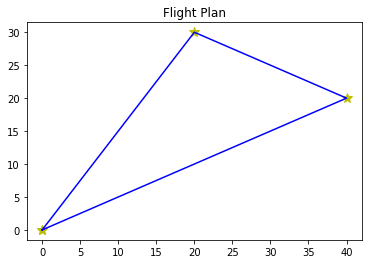

In [ ]:
fp_x, fp_y = flight_plan(waypoints)
plt.plot([w[0] for w in waypoints], [w[1] for w in waypoints], 'y*', markersize=10)
plt.plot(fp_x, fp_y, 'b-')
p = plt.title("Flight Plan")

# Designing your Flight Controller
Now we have all of the pieces together that you need to design your first autonomous system! For this first version we will design what is called an "open-loop controller", which means that it will not get feedback about where it is in the world. Instead, we will list our a series of commands to be applied at specific times to get the drone to get near all of the waypoints. 

Before you do anything else, run the code below now and see what happens!

You should see that your drone takes off in a straight line is isn't able to hit all the way points. 

Now, in the openloop controller function, add the line 
```
if t==20:
   return (-1,1)
```
before the return statement and re-run your code. What happens now?

Try to come up with a sequence of commands that allows your drone to hit all (or some of its waypoints)


In [ ]:
%%capture
def openloop_controller(t):
  if t==21:
   return (0,-2) #this is the force, decides what thrust to apply to the drone 
  if t==41: 
    return (-3,-.5)
  return (0,0)

x, y = simulate(Drone(0,0,1,1.5), openloop_controller)
anim = make_animation((x,y), flight_plan(waypoints), waypoints)

In [ ]:
anim

## Adding disturbances. 
Now that you have created an openloop controller, let's see what happens when the drone is subjected to some disturbances. Fill in the function below to return `(Wx, Wy)` where each one is randomly sampled from the range `[-1, 1]`. If you are unsure how to do this, look into the function `random.uniform`.

In [ ]:
def windy(t):
  Wx = random.uniform(-1, 1)
  Wy = random.uniform(-1, 1)
  return (Wx, Wy)
  ## Your code here: 

Now re-run your open-loop controller and see what effect the wind has!

In [ ]:
%%capture
x, y = simulate(Drone(0,0,1,1.5), openloop_controller, windy)
anim = make_animation((x,y), flight_plan(waypoints), waypoints)

In [ ]:
anim

## Nice Job!

Great job building your first simulator! That was not easy! As you may have found, desiging openloop controllers is time consuming and doesn't work well when your system has disturbances. Tomorrow we will learn about closed-loop control which can fix these problems!